In [1]:
import torch
import sys, os, cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_hyp_text_path = "C:/Users/shins/HyperImaging/Dataset/image formation/img_hyp_text"

In [3]:
img_list = os.listdir(img_hyp_text_path)

In [4]:
img_choice = img_list[0]

In [5]:
hyp_img = np.load(os.path.join(img_hyp_text_path, img_choice)).astype(np.float32)
hyp_img = torch.tensor(hyp_img)


In [6]:
print('hyp_img type:',type(hyp_img), 'hyp_img shape:', hyp_img.shape)

hyp_img type: <class 'torch.Tensor'> hyp_img shape: torch.Size([640, 640, 77])


In [7]:
illum_path = "C:/Users/shins/HyperImaging/Calibration/patterns/graycode_pattern"
illum = cv2.imread(os.path.join(illum_path, "pattern_12.png")).astype(np.float32)
illum = torch.tensor(illum)

In [8]:
R = illum.shape[0]
C = illum.shape[1]

In [9]:
illum = illum.reshape(illum.shape[0]* illum.shape[1], 3)

mask_0 = (illum[:,:] < 150)
mask_1 = (illum[:,:] >= 150)

ill = np.ma.array(illum, mask = mask_0)
ill = ill.filled(fill_value = 0.0)

ill = np.ma.array(ill, mask= mask_1)
ill = ill.filled(fill_value = 1.0)

ill = ill.reshape(720,1280, 3)

ill = torch.tensor(ill)

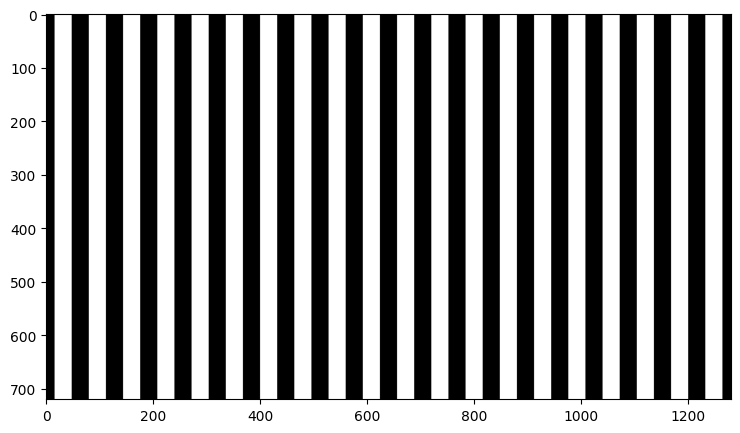

In [10]:
plt.figure(figsize=(10,5))
plt.imshow(ill)

In [11]:
hyp_img.shape

torch.Size([640, 640, 77])

In [12]:
ill.shape

torch.Size([720, 1280, 3])

In [13]:
# make ill to 720, 1280, 77
a = np.zeros(shape= (720,1280,77))

In [14]:
a.shape

(720, 1280, 77)

In [15]:
for i in range(25):
    if i == 0 :
        ill_77 = np.append(ill, ill, axis=2)
    else:
        ill_77 = np.append(ill_77, ill, axis=2)
ill_77 = np.delete(ill_77, -1, axis = 2)

In [16]:
ill_77.shape

(720, 1280, 77)

In [17]:
ill_77_reshape = ill_77.reshape(720*1280,77)
a_reshape = a.reshape(720*1280,77)

In [18]:
a_reshape[:,:] = ill_77_reshape[:,:]

In [19]:
a = a_reshape.reshape(720,1280,77)

In [20]:
a.shape

(720, 1280, 77)

In [21]:
if 1.0 in ill:
    print('yes')

yes


In [22]:
import tifffile

def array_to_tif(arr, i):
    """     Make array into tif file
    
    check hyperspectral image / tif file
    """
    arr = np.swapaxes(arr,0,2)
    arr = np.swapaxes(arr,1,2)
    # tifffile.imwrite(f'./tif_file/output_scene_{i}.tif', arr)
    tifffile.imwrite(f'./scene_{i}_hyp_text.tif', arr)

In [23]:
# # hyp_img_2 = hyp_img * a
# a = torch.tensor(a)
# array_to_tif(a, 3)